In [2]:
# Imports das bibliotecas
import pandas as pd
import requests

In [3]:
# URL da API
url = "https://fakestoreapi.com/products"
# Fazendo a requisição GET
resposta = requests.get(url)
# Verificando se deu tudo certo
if resposta.status_code == 200:
    dados = resposta.json()
    print("Dados recebidos com sucesso!")
else:
    print(f"Erro na requisição: {resposta.status_code}")

Dados recebidos com sucesso!


In [4]:
# Criando o DataFrame
df = pd.DataFrame(dados)

In [5]:
# Exibindo as 5 primeiras linhas
df.head()

,id,title,price,description,category,image,rating
0,1,"Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...",109.95,Your perfect pack for everyday use and walks i...,men's clothing,https://fakestoreapi.com/img/81fPKd-2AYL._AC_S...,"{'rate': 3.9, 'count': 120}"
1,2,Mens Casual Premium Slim Fit T-Shirts,22.30,"Slim-fitting style, contrast raglan long sleev...",men's clothing,https://fakestoreapi.com/img/71-3HjGNDUL._AC_S...,"{'rate': 4.1, 'count': 259}"
2,3,Mens Cotton Jacket,55.99,great outerwear jackets for Spring/Autumn/Wint...,men's clothing,https://fakestoreapi.com/img/71li-ujtlUL._AC_U...,"{'rate': 4.7, 'count': 500}"
3,4,Mens Casual Slim Fit,15.99,The color could be slightly different between ...,men's clothing,https://fakestoreapi.com/img/71YXzeOuslL._AC_U...,"{'rate': 2.1, 'count': 430}"
4,5,John Hardy Women's Legends Naga Gold & Silver ...,695.00,"From our Legends Collection, the Naga was insp...",jewelery,https://fakestoreapi.com/img/71pWzhdJNwL._AC_U...,"{'rate': 4.6, 'count': 400}"


In [6]:
# Verificando o nome dos titulo (colunas)
print(df.columns)

Index(['id', 'title', 'price', 'description', 'category', 'image', 'rating'], dtype='object')


In [7]:
# Verificando os tipos de dados
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           20 non-null     int64  
 1   title        20 non-null     object 
 2   price        20 non-null     float64
 3   description  20 non-null     object 
 4   category     20 non-null     object 
 5   image        20 non-null     object 
 6   rating       20 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.2+ KB
None


In [8]:
# Verificando a estatistica da coluna price, que possui valores númericos do tipo float
df['price'].describe()

count     20.000000
mean     162.046000
std      272.220532
min        7.950000
25%       15.240000
50%       56.490000
75%      110.962500
max      999.990000
Name: price, dtype: float64

In [9]:
# Filtrando valores com preço maior que $ 100.00
produtos_caros = df[df['price']>100]

In [10]:
print(produtos_caros[['title', 'price']])

                                                title   price
0   Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...  109.95
4   John Hardy Women's Legends Naga Gold & Silver ...  695.00
5                        Solid Gold Petite Micropave   168.00
9   SanDisk SSD PLUS 1TB Internal SSD - SATA III 6...  109.00
10  Silicon Power 256GB SSD 3D NAND A55 SLC Cache ...  109.00
11  WD 4TB Gaming Drive Works with Playstation 4 P...  114.00
12  Acer SB220Q bi 21.5 inches Full HD (1920 x 108...  599.00
13  Samsung 49-Inch CHG90 144Hz Curved Gaming Moni...  999.99


In [11]:
# Contagem por categorias
contagem_categorias = df['category'].value_counts()
print(contagem_categorias)

category
electronics         6
women's clothing    6
men's clothing      4
jewelery            4
Name: count, dtype: int64


In [12]:
# Expandindo a coluna Rating
# Expande a coluna "rating" em duas novas colunas
df_rating_expandido = pd.json_normalize(df['rating'])

In [13]:
# Junta com o DataFrame original
df = pd.concat([df.drop(columns=['rating']), df_rating_expandido], axis=1)

In [14]:
df[['title', 'price', 'rate', 'count']].head()

,title,price,rate,count
0,"Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...",109.95,3.9,120
1,Mens Casual Premium Slim Fit T-Shirts,22.30,4.1,259
2,Mens Cotton Jacket,55.99,4.7,500
3,Mens Casual Slim Fit,15.99,2.1,430
4,John Hardy Women's Legends Naga Gold & Silver ...,695.00,4.6,400


In [15]:
# Salvando o DataFrame como CSV no mesmo diretorio do jupyter lab.
#df.to_csv("produtos_fakestore.csv", index=False)
df.to_csv("produtos_openbrewerydb.csv", index=False)
print("Arquivo CSV salvo com sucesso!")

Arquivo CSV salvo com sucesso!


In [16]:
!pip install seaborn

In [17]:
# Visualização com gráficos
import matplotlib.pyplot as plt
import seaborn as sns

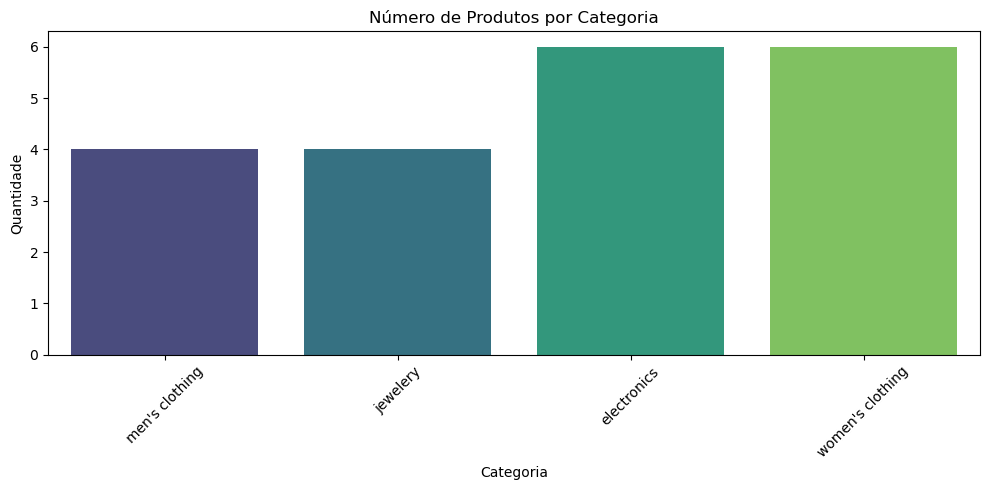

In [18]:
# Ajustes visuais
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='category', hue='category', palette='viridis', legend=False)
plt.title("Número de Produtos por Categoria")
plt.xlabel("Categoria")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()